In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [2]:
Beras_Import = pd.read_csv("/content/Beras.csv", sep=';')
print(Beras_Import)

     Tahun      Bulan  Harga Beras
0   2018.0    Januari     10349.91
1      NaN   Februari     10381.74
2      NaN      Maret      9892.56
3      NaN      April      9524.96
4      NaN        Mei      9523.88
5      NaN       Juni      9478.05
6      NaN       Juli      9519.93
7      NaN    Agustus      9458.07
8      NaN  September      9572.03
9      NaN    Oktober      9645.30
10     NaN   November      9770.97
11     NaN   Desember      9818.07
12  2019.0    Januari     10111.08
13     NaN   Februari     10007.91
14     NaN      Maret      9814.53
15     NaN      April      9464.68
16     NaN        Mei      9462.05
17     NaN       Juni      9515.51
18     NaN       Juli      9519.35
19     NaN    Agustus      9530.00
20     NaN  September      9594.39
21     NaN    Oktober      9659.17
22     NaN   November      9742.16
23     NaN   Desember      9838.26
24  2020.0    Januari     10032.66
25     NaN   Februari     10080.80
26     NaN      Maret     10082.43
27     NaN      Apri

In [3]:
HB= pd.Series(Beras_Import['Harga Beras'].values, index=pd.date_range(start='2018-01', periods=len(Beras_Import), freq='ME'))
print(HB)

2018-01-31    10349.91
2018-02-28    10381.74
2018-03-31     9892.56
2018-04-30     9524.96
2018-05-31     9523.88
2018-06-30     9478.05
2018-07-31     9519.93
2018-08-31     9458.07
2018-09-30     9572.03
2018-10-31     9645.30
2018-11-30     9770.97
2018-12-31     9818.07
2019-01-31    10111.08
2019-02-28    10007.91
2019-03-31     9814.53
2019-04-30     9464.68
2019-05-31     9462.05
2019-06-30     9515.51
2019-07-31     9519.35
2019-08-31     9530.00
2019-09-30     9594.39
2019-10-31     9659.17
2019-11-30     9742.16
2019-12-31     9838.26
2020-01-31    10032.66
2020-02-29    10080.80
2020-03-31    10082.43
2020-04-30    10018.19
2020-05-31     9826.63
2020-06-30     9918.95
2020-07-31     9931.71
2020-08-31     9962.65
2020-09-30     9871.12
2020-10-31     9812.90
2020-11-30     9714.50
2020-12-31     9787.86
2021-01-31     9780.19
2021-02-28     9772.10
2021-03-31     9606.97
2021-04-30     9549.76
2021-05-31     9627.08
2021-06-30     9537.16
2021-07-31     9401.61
2021-08-31 

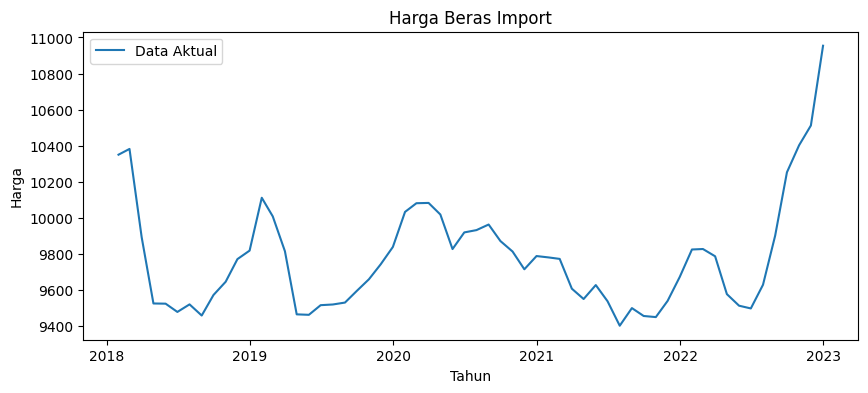

In [4]:
plt.figure(figsize=(10,4))
plt.plot(HB, label='Data Aktual')
plt.title("Harga Beras Import")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.legend()
plt.show()

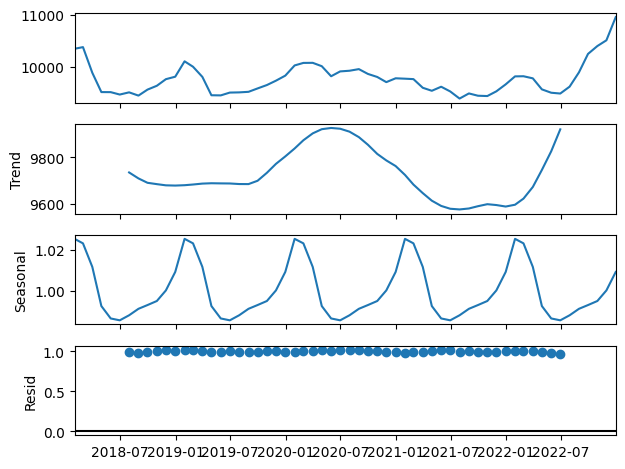

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(HB, model='multiplicative', period=12)
result.plot()
plt.show()

In [6]:
model_add = ExponentialSmoothing(HB, trend='add', seasonal='add', seasonal_periods=12)
fit_add = model_add.fit()
print(fit_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   60
Model:             ExponentialSmoothing   SSE                         675979.947
Optimized:                         True   AIC                            591.774
Trend:                         Additive   BIC                            625.284
Seasonal:                      Additive   AICC                           608.457
Seasonal Periods:                    12   Date:                 Tue, 04 Nov 2025
Box-Cox:                          False   Time:                         14:54:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [7]:
model_mul = ExponentialSmoothing(HB, trend='mul', seasonal='mul', seasonal_periods=12)
fit_mul = model_mul.fit()
print(fit_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   60
Model:             ExponentialSmoothing   SSE                         659737.485
Optimized:                         True   AIC                            590.315
Trend:                   Multiplicative   BIC                            623.825
Seasonal:                Multiplicative   AICC                           606.998
Seasonal Periods:                    12   Date:                 Tue, 04 Nov 2025
Box-Cox:                          False   Time:                         14:54:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [8]:
pred_add = fit_add.forecast(12)
pred_mul = fit_mul.forecast(12)

print(pred_mul)

2023-01-31    11305.446734
2023-02-28    11489.174622
2023-03-31    11468.985690
2023-04-30    11402.532106
2023-05-31    11530.191747
2023-06-30    11701.261841
2023-07-31    11883.908947
2023-08-31    12139.592973
2023-09-30    12406.649215
2023-10-31    12628.435965
2023-11-30    12869.750555
2023-12-31    13244.313060
Freq: ME, dtype: float64


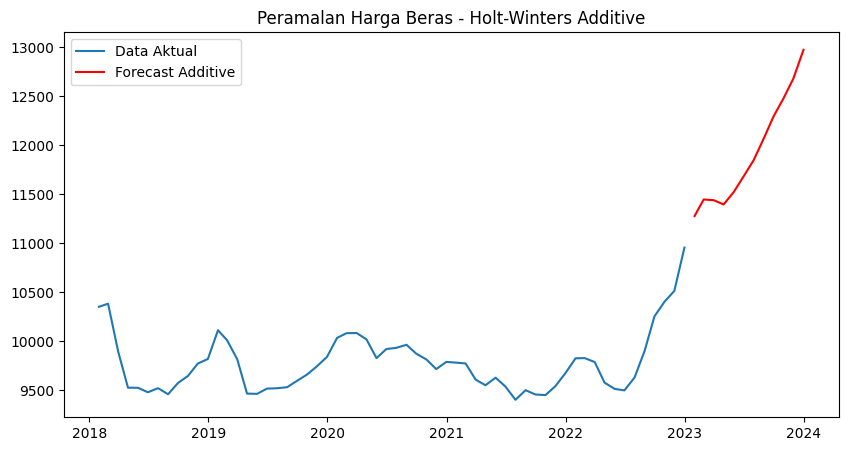

In [9]:
plt.figure(figsize=(10,5))
plt.plot(HB, label='Data Aktual')
plt.plot(pred_add, label='Forecast Additive', color='red')
plt.title('Peramalan Harga Beras - Holt-Winters Additive')
plt.legend()
plt.show()

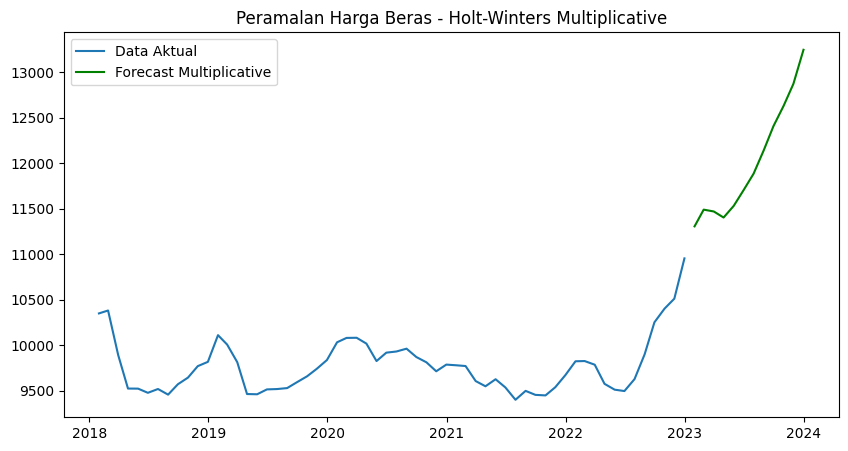

In [10]:
plt.figure(figsize=(10,5))
plt.plot(HB, label='Data Aktual')
plt.plot(pred_mul, label='Forecast Multiplicative', color='green')
plt.title('Peramalan Harga Beras - Holt-Winters Multiplicative')
plt.legend()
plt.show()

In [11]:
def accuracy(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

In [12]:
acc_add = accuracy(HB, fit_add.fittedvalues)
acc_mul = accuracy(HB, fit_mul.fittedvalues)

print("Akurasi Holt-Winters Additive:", acc_add)
print("Akurasi Holt-Winters Multiplicative:", acc_mul)

Akurasi Holt-Winters Additive: {'MAE': 85.83996715279623, 'RMSE': np.float64(106.14298116427088), 'MAPE': np.float64(0.8758244216713988)}
Akurasi Holt-Winters Multiplicative: {'MAE': 85.26140166383824, 'RMSE': np.float64(104.86002452505079), 'MAPE': np.float64(0.8700590244390214)}


In [13]:
resid = fit_mul.resid
se = np.std(resid)
z = 1.96  # untuk 95% CI

forecast_values = pred_mul.values
lower = forecast_values - z * se
upper = forecast_values + z * se

ci = pd.DataFrame({'forecast': forecast_values, 'lower_95': lower, 'upper_95': upper}, index=pred_mul.index)
print(ci)

                forecast      lower_95      upper_95
2023-01-31  11305.446734  11102.062890  11508.830578
2023-02-28  11489.174622  11285.790778  11692.558466
2023-03-31  11468.985690  11265.601846  11672.369534
2023-04-30  11402.532106  11199.148262  11605.915951
2023-05-31  11530.191747  11326.807903  11733.575591
2023-06-30  11701.261841  11497.877997  11904.645685
2023-07-31  11883.908947  11680.525102  12087.292791
2023-08-31  12139.592973  11936.209129  12342.976817
2023-09-30  12406.649215  12203.265371  12610.033059
2023-10-31  12628.435965  12425.052121  12831.819809
2023-11-30  12869.750555  12666.366711  13073.134399
2023-12-31  13244.313060  13040.929216  13447.696904
